# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 16 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [ ]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /content/Cauchy.csv
100% 18.7k/18.7k [00:00<00:00, 24.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /content/Weibull.csv
100% 17.9k/17.9k [00:00<00:00, 6.96MB/s]


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

In [ ]:
%config InlineBackend.figure_format="retina"  # only for retina display

In [ ]:
from typing import List, Union, Optional, Tuple, Callable

In [ ]:
np.random.seed(42)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на отрезке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле `Cauchy.csv` находятся координаты точек
пересечения лучей с поверхностью Земли.

In [ ]:
cauchy_sample = pd.read_csv("Cauchy.csv")["sample"].values

In [ ]:
len(cauchy_sample)

1000

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


Сделаем так – сгенерируем сетку, сделаем матрицу размером $grid\_size \times sample\_size$, в которой по строчкам будет дубилироваться входная выборка, далее вычтем из каждой строчки $i$ элемент сетки под номером $i$. Тогда посчитаем значение плотности в этих точках, прологарифмируем, и сложим по строчке, получим значение функции правдоподобия в точках нашей сетки, тогда найдя точку на которой достигается максимум получим оценку параметра сдвига.

In [ ]:
def mle(sample: np.array, x_min: int, x_max: int, sample_cutoff: int = None):
  grid = np.arange(x_min, x_max, 0.01)
  if sample_cutoff is not None:
    sample = sample[:sample_cutoff]
  matrix_of_standart_cauchy_samples = sample - grid[:, np.newaxis]
  likelyhood_function = np.sum(np.log(sps.cauchy.pdf(matrix_of_standart_cauchy_samples)), axis=1)
  return grid[np.argmax(likelyhood_function)]

Оценка параметра по первым 10 измерения:

In [ ]:
mle(cauchy_sample, x_min=-1000, x_max=1000, sample_cutoff=10)

208.52999999890085

In [ ]:
mle(cauchy_sample, x_min=200, x_max=250, sample_cutoff=10)

208.52999999999224

Оценка параметра по первым 100 измерениям:

In [ ]:
mle(cauchy_sample, x_min=-1000, x_max=1000, sample_cutoff=100)

207.89999999890142

Оценка параметра по всей выборке:

In [ ]:
mle(cauchy_sample, x_min=-500, x_max=500)

207.9799999993561

Сравните полученные результаты с `sps.cauchy.fit`

In [ ]:
sps.cauchy.fit(cauchy_sample)

(207.97772827944334, 0.9451391657739621)

__Вывод__ Как видно оценка по методу MLE дает такой же результат как и `sps.cauchy.fit` с точностью до двух знаков после запятой.

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [ ]:
weibull_sample = np.loadtxt("Weibull.csv")

In [ ]:
len(weibull_sample)

3652

Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна

In [ ]:
def hist_sample(
    sample: np.array,
    distribution_name: str, 
    bins_num: int,
    x_min: int = None,
    x_max: int = None,
    ):
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Гистрограмма выборки с распределением {}'.format(distribution_name),
        fontsize = 23
    )

    if x_min is not None and x_max is not None:
      axis.set_xlim(x_min, x_max)
    
    axis.hist(
        sample,
        bins=bins_num,
        density=False, 
        alpha= 0.5,
    )
    axis.set_xlabel('Значение элемента выборки', fontsize=20)
    axis.set_ylabel('Количество элементов выборки с данным значением', fontsize=18)
    plt.yscale('log')
    plt.show()
    return 

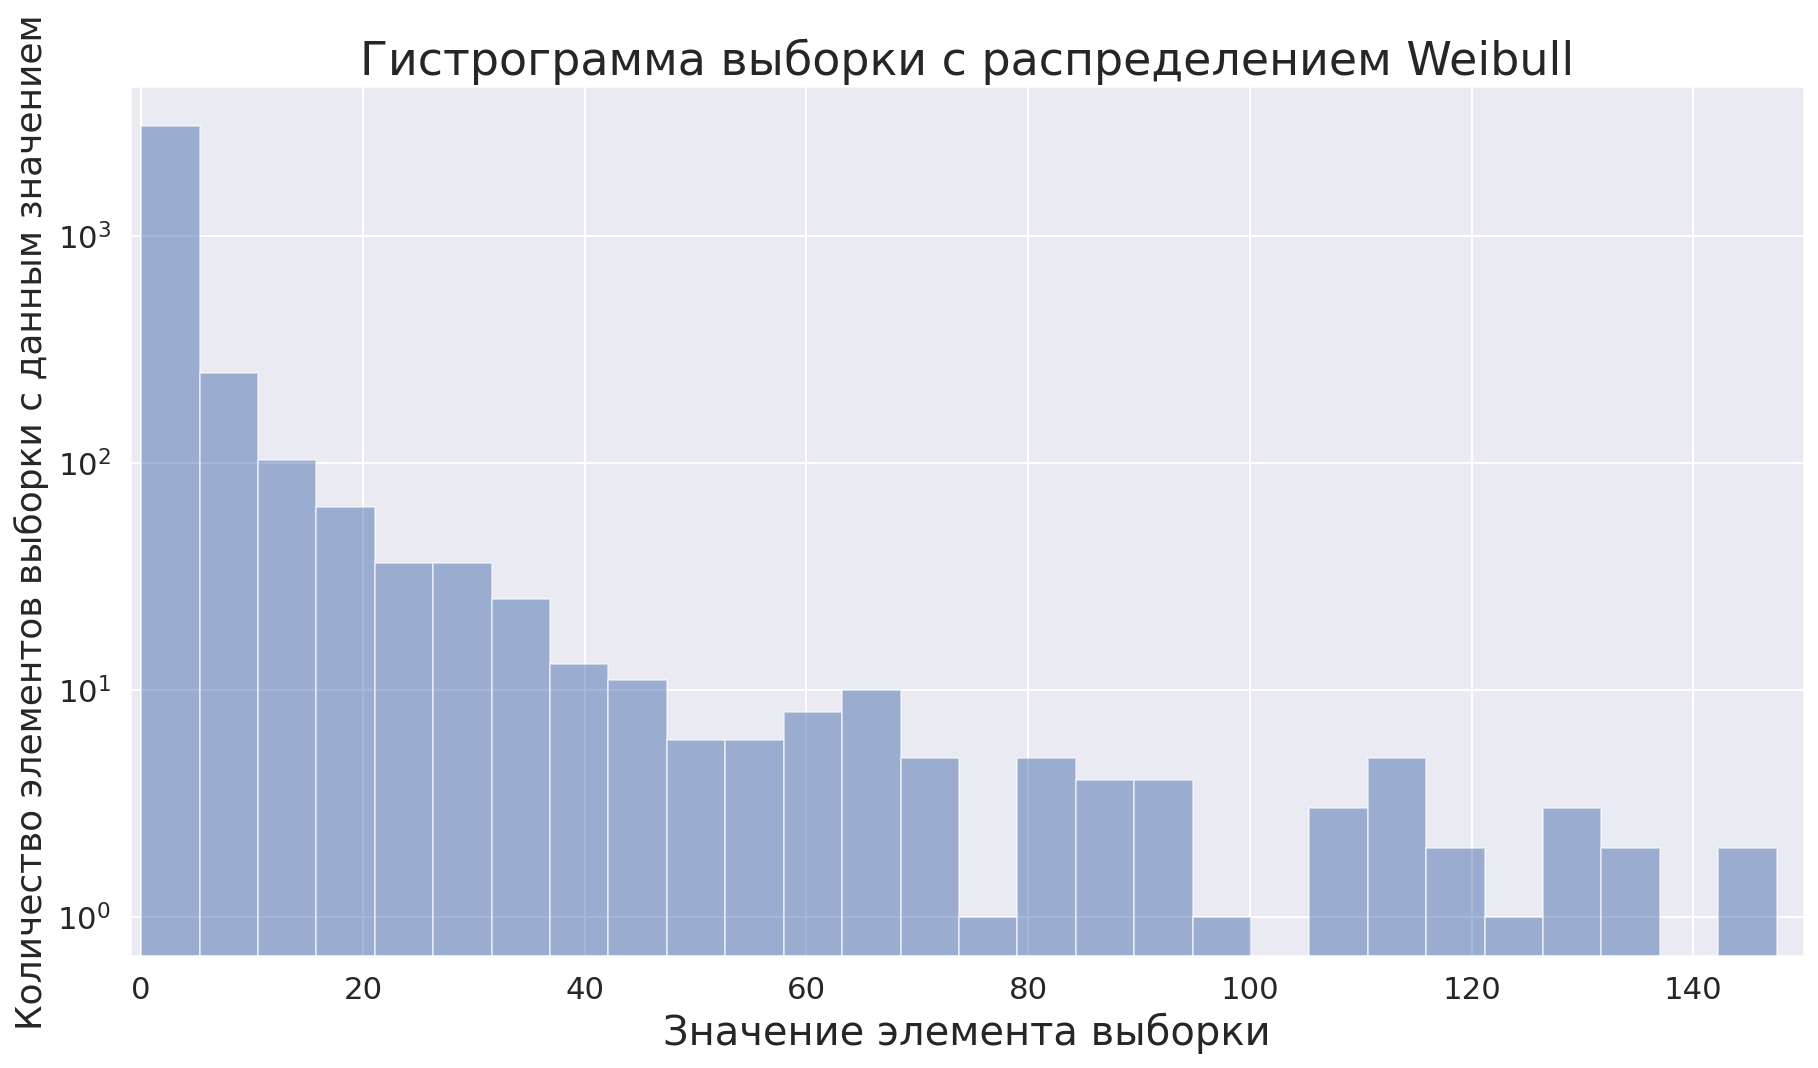

In [ ]:
hist_sample(weibull_sample, distribution_name='Weibull', bins_num=70, x_min=-1, x_max=150)

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам сравнить два способа рещения этой проблемы:

1. Отбросить нули до построения эмпирической функции распределения $\hat{F}(x)$
2. Построить эмпирическую функцию, а затем учитывать только те точки, x-координата которых положительна.

Для первого способа отфильтруйте выборку в ячейке ниже

In [ ]:
filtered_weibull_sample = weibull_sample[weibull_sample != 0]
len(filtered_weibull_sample[filtered_weibull_sample == 0])

0

Для каждого способа подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. 

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
from collections import namedtuple

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Plot = namedtuple('Plot', ['x_value', 'y_value', 'legend', 'color'])

In [ ]:
def calculate_x_and_y(ECDF_func, sample: np.array):
  x = np.log(sample)
  y = np.log(-np.log(np.full((len(sample)), 1) - ECDF_func(sample)))
  return x, y

In [ ]:
ECDF_filtered = ECDF(filtered_weibull_sample)
x_filtered, y_filtered = calculate_x_and_y(ECDF_filtered, filtered_weibull_sample)
plot_filtered = Plot(
    x_filtered,
    y_filtered,
    'Weibull plot построенный без учета нулевых значений',
    'red')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ECDF_not_filtered = ECDF(weibull_sample)
x_not_filtered, y_not_filtered = calculate_x_and_y(ECDF_not_filtered, filtered_weibull_sample)
plot_not_filtered = Plot(
    x_not_filtered,
    y_not_filtered,
    'Weibull plot построенный с учетом нулевых значений',
    'blue')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


Постройте график (`plt.scatter`) для первого способа красным цветом, а для второго — синим. Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

In [ ]:
def draw_weibull_plot(list_to_plot: List[Plot]):
    '''
    Takes List of Plot namedtuples and scatter them
      Args: List[Plot]
    '''
    fig, axis = plt.subplots()
    fig.set_size_inches(15, 8)
    
    axis.set_title(
        'Weibull-plot построенный с и без учета нулевых значений в выборке',
        fontsize = 23
    )
    for plot in list_to_plot:
      axis.scatter(
          plot.x_value,
          plot.y_value,
          alpha=0.05,
          label=plot.legend,
          color=plot.color,
      )
    
    axis.set_xlabel('Theoretical quantiles', fontsize=20)
    axis.set_ylabel('Sample quantiles', fontsize=20)
    axis.legend(loc='best')
    plt.show()
    return 

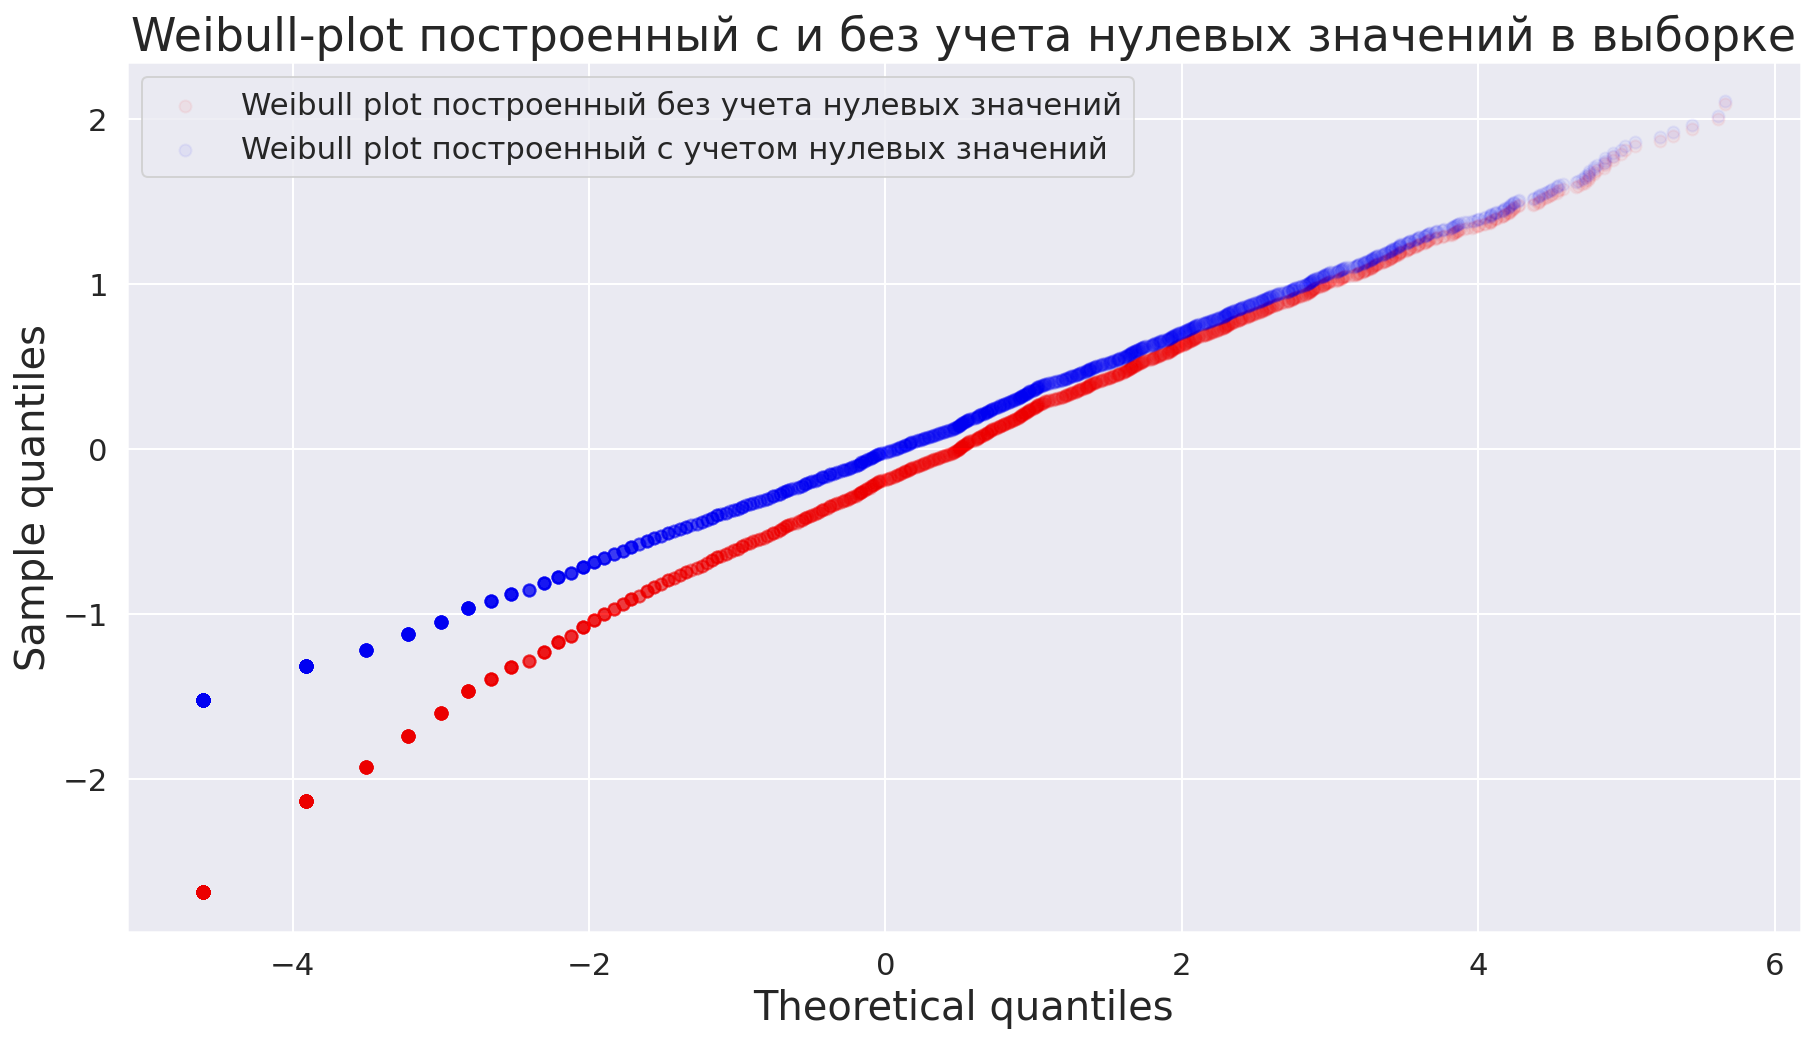

In [ ]:
draw_weibull_plot([plot_filtered, plot_not_filtered])

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод** Более правильным кажется второй способ, то есть синий график, потому что изначально мы учитываем всю информацию о выборке и получаем более точную функцию распределения, и только потом строим с ее учетом во всех возможных точках, где значение определено. Причем видно, что красная прямая не проходит через начало координат, хотя должна была получиться примерно прямая $y=\gamma x$, которая через 0 проходит

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

Чтобы посчитать функцию правдоподобия в этом делаю так - дублирую выборку построчно, получая матрицу размера $grid\_size \times sample\_size$, а сетку добавляем первым столбцом в полученную матрицу. Потом построчно считаем `weibull_min.logpdf` с параметром $\gamma$ посчитанным из нулевого элемента строки, дальше суммируем полученные значения построчно и получаем значения функции правдоподобия на нашей сетке, среди этих значений находим индекс максимального, ответ лежит по такому же индексу в сетке.

In [ ]:
def weibull_mle(sample: np.array, x_min: int, x_max: int):
  grid = np.arange(x_min, x_max, 0.001)
  samples_with_grid_values = np.c_[grid, np.tile(sample, (len(grid), 1))]
  log_matrix = np.apply_along_axis(
      lambda row: sps.weibull_min(10**row[0]).logpdf(row[1:]),
      1, 
      samples_with_grid_values)
  likelyhood_func = np.sum(log_matrix, axis=1)
  return 10**grid[np.argmax(likelyhood_func)]

In [ ]:
four_years_sample = weibull_sample[:355*4 + 1]
four_years_sample_filtered = four_years_sample[four_years_sample > 0]

In [ ]:
weibull_mle(four_years_sample_filtered, -2, 2)

0.41686938347016417

In [ ]:
weibull_mle(filtered_weibull_sample, -2, 2)

0.41020410298643906

Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [ ]:
sps.weibull_min.fit(filtered_weibull_sample, fscale=1, floc=0)

(0.41025390624999947, 0, 1)

И снова видим, что значение полученное с помощью MLE совпадает со значением полученным с помощью `sps.weibull.fit(sample_2, fscale=1, floc=0)` с точностью до 4-ого знака после запятой.

In [ ]:
GAMMA_ARRAY = [0.42, 0.41, 0.35]

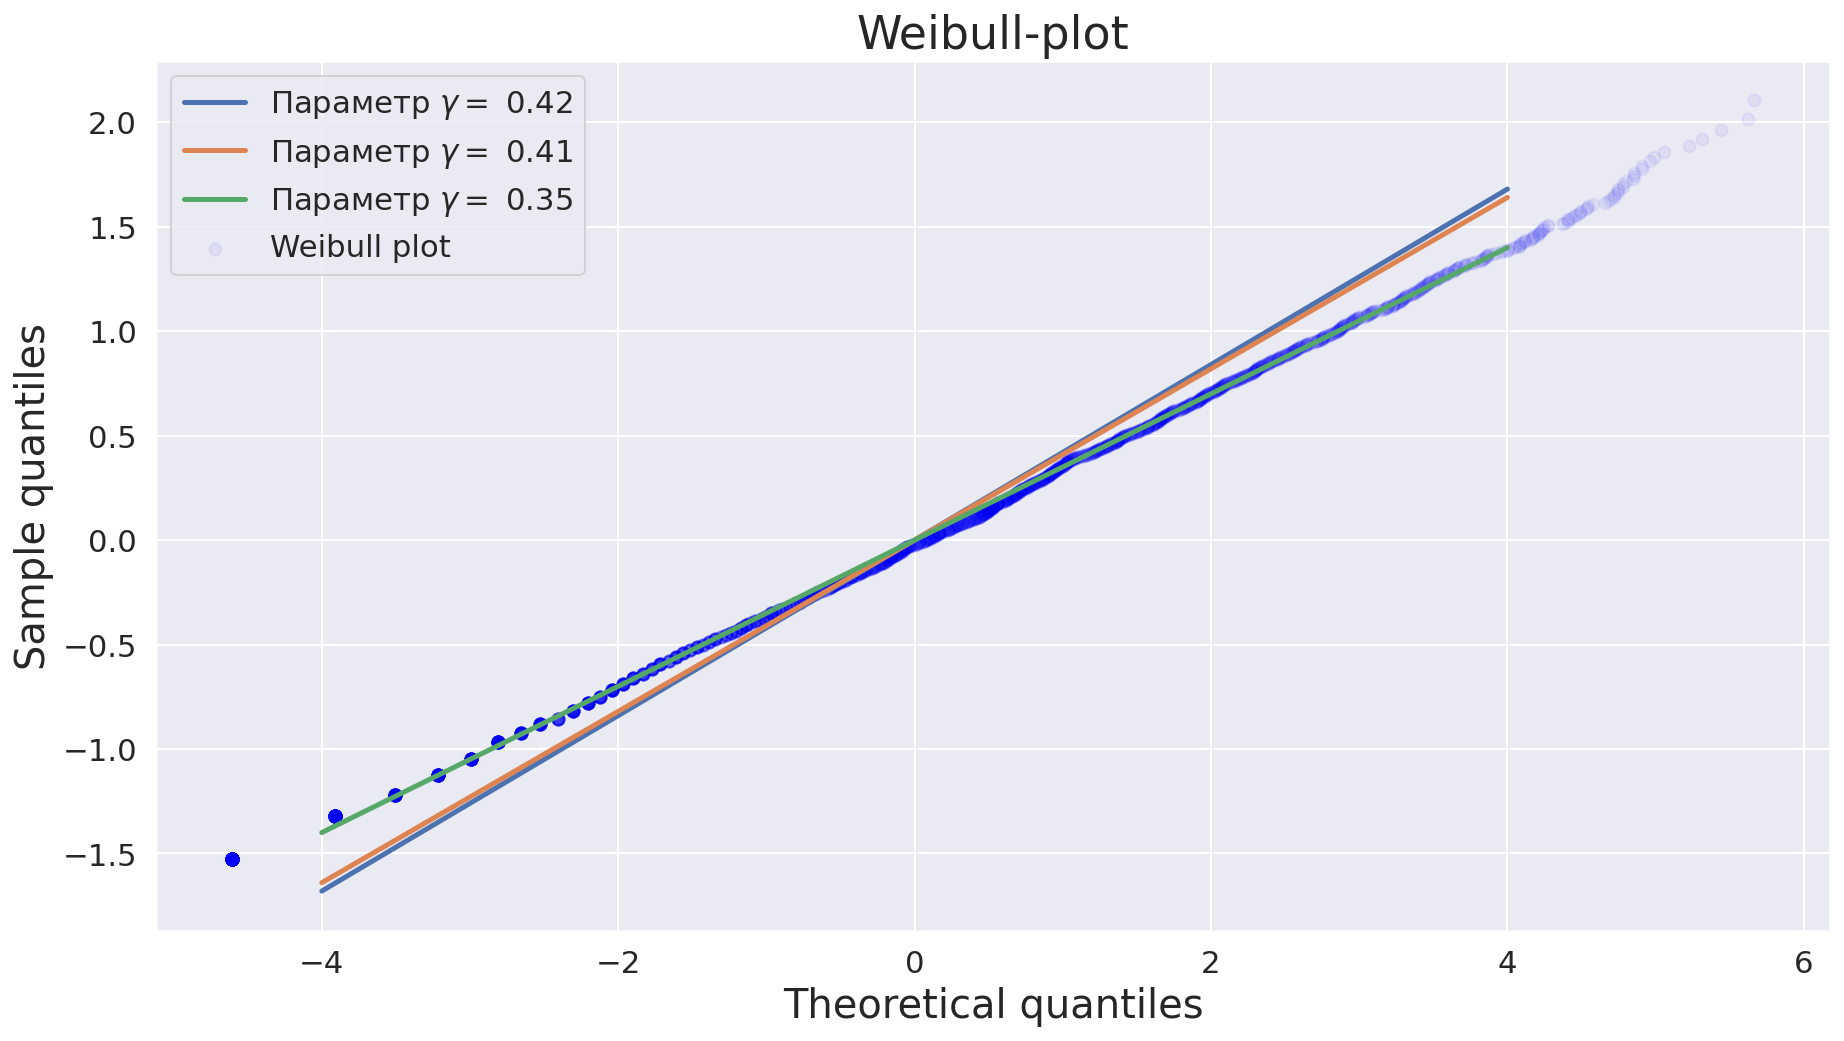

In [ ]:
fig, axis = plt.subplots()
fig.set_size_inches(15, 8)
axis.set_title(
    'Weibull-plot',
    fontsize = 23
)
axis.scatter(
    plot_not_filtered.x_value,
    plot_not_filtered.y_value,
    alpha=0.05,
    label='Weibull plot',
    color='blue',
)
grid = np.linspace(-4, 4, 10000)
for gamma in GAMMA_ARRAY:
  axis.plot(
      grid,
      gamma * grid,
      label=r'Параметр $\gamma = $ {}'.format(gamma),
      linewidth=2.5,
  )
axis.set_xlabel('Theoretical quantiles', fontsize=20)
axis.set_ylabel('Sample quantiles', fontsize=20)
axis.legend(loc='best')
plt.show()

Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод** Линии не точно соотвествуют выборке, видно что реальный наклон прямой для выборки немного меньше найденных оценок для $\gamma$. Для данной выборки больше подходит прямая с $\gamma = 0.35$ (выше на графике оно изображено и подобрано руками). А произойти так могло, потому что MLE может давать смещенные оценки.

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [ ]:
THETA = 3
N = 1000

In [ ]:
norm_sample = sps.norm(loc=0, scale=np.sqrt(THETA)).rvs(N)
uniform_sample = sps.uniform(loc=0, scale=THETA).rvs(N)
gamma_sample = sps.gamma(a=1, loc=0, scale=THETA).rvs(N)

In [ ]:
class MomentsMethod:

  @staticmethod
  def sample_mean(sample: np.array) -> np.array:
    '''
      Takes a sample returns an array of means of every prefix subsample
    '''
    return np.cumsum(sample) / (np.arange(len(sample)) + 1)
  
  @staticmethod
  def sample_biased_variance(sample: np.array) -> np.array:
    '''
        Takes a sample returns an array of sample biased variance of every prefix subsample
    '''
    return np.cumsum(sample ** 2) / (np.arange(len(sample)) + 1) - \
           MomentsMethod.sample_mean(sample) ** 2

  @staticmethod
  def normal_estimation(sample: np.array) -> np.array:
    '''
      Counts estimations of sigma**2 assuming a = 0 with MomentsMethod for every prefix subsample
    '''
    return np.cumsum(sample ** 2) / (np.arange(len(sample)) + 1) 

  @staticmethod
  def uniform_estimation(sample: np.array) -> np.array:
    '''
      Counts estimations of b assuming a = 0 with MomentsMethod
      for every prefix subsample
    '''
    return 2 * MomentsMethod.sample_mean(sample)

  @staticmethod
  def gamma_estimation(sample: np.array) -> np.array:
    '''
      Counts estimations of \betta assuming \alpha= 1 with MomentsMethod 
      for every prefix subsample
    '''
    return MomentsMethod.sample_mean(sample)

In [ ]:
def draw_estimation_difference(
    sample: np.array,
    mom_estimator: Callable[[np.array, np.array], np.array],
    real_value: float,
    label: str,
    ):
  fig, axis = plt.subplots()
  fig.set_size_inches(15, 8)
  axis.set_title(
      'График модуля разности оценки параметра и его реального значения',
      fontsize = 23
  )
  grid = np.arange(len(sample)) + 1
  axis.plot(
        grid,
        np.absolute(mom_estimator(sample) - real_value),
        label=label,
  )
  axis.set_xlabel('Размер выборки', fontsize=20)
  axis.set_ylabel('Значение модуля разности', fontsize=20)
  axis.legend(loc='best')
  plt.show()

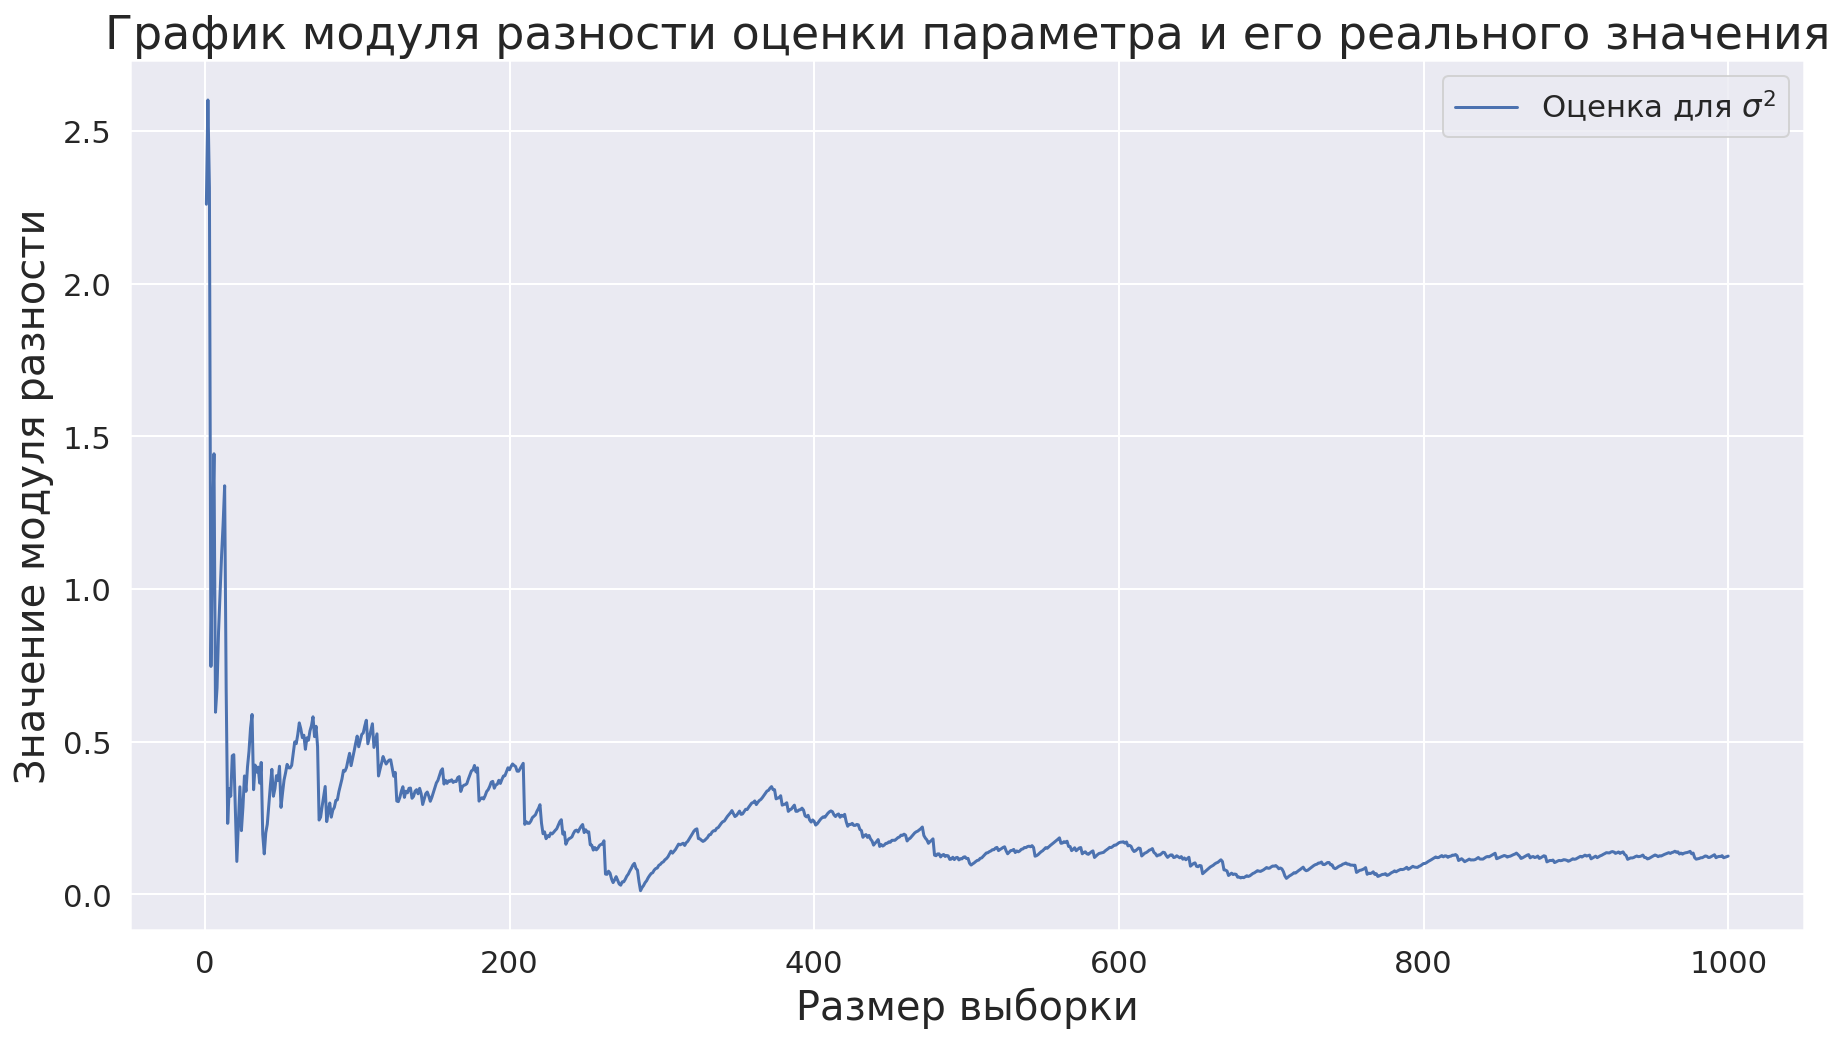

In [ ]:
draw_estimation_difference(
    norm_sample,
    MomentsMethod.normal_estimation,
    THETA,
    r'Оценка для $\sigma^2$',
)

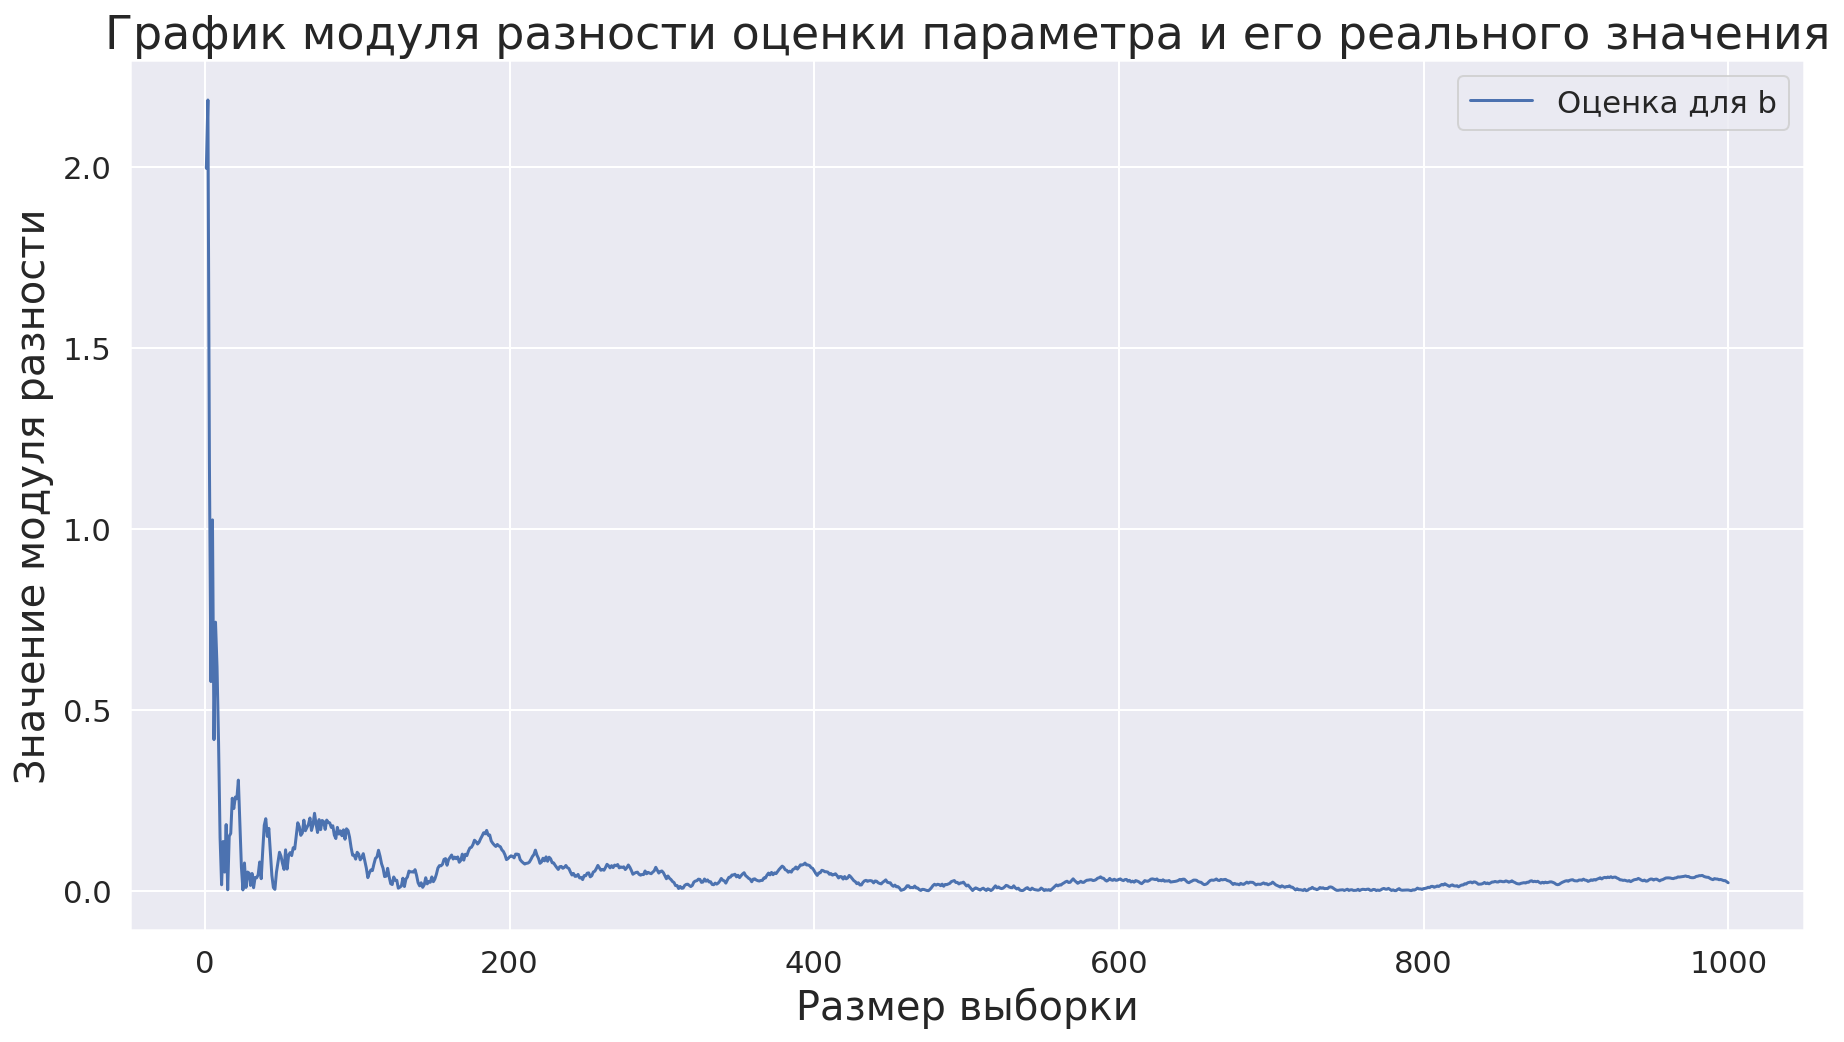

In [ ]:
draw_estimation_difference(
    uniform_sample,
    MomentsMethod.uniform_estimation,
    THETA,
    r'Оценка для b',
)

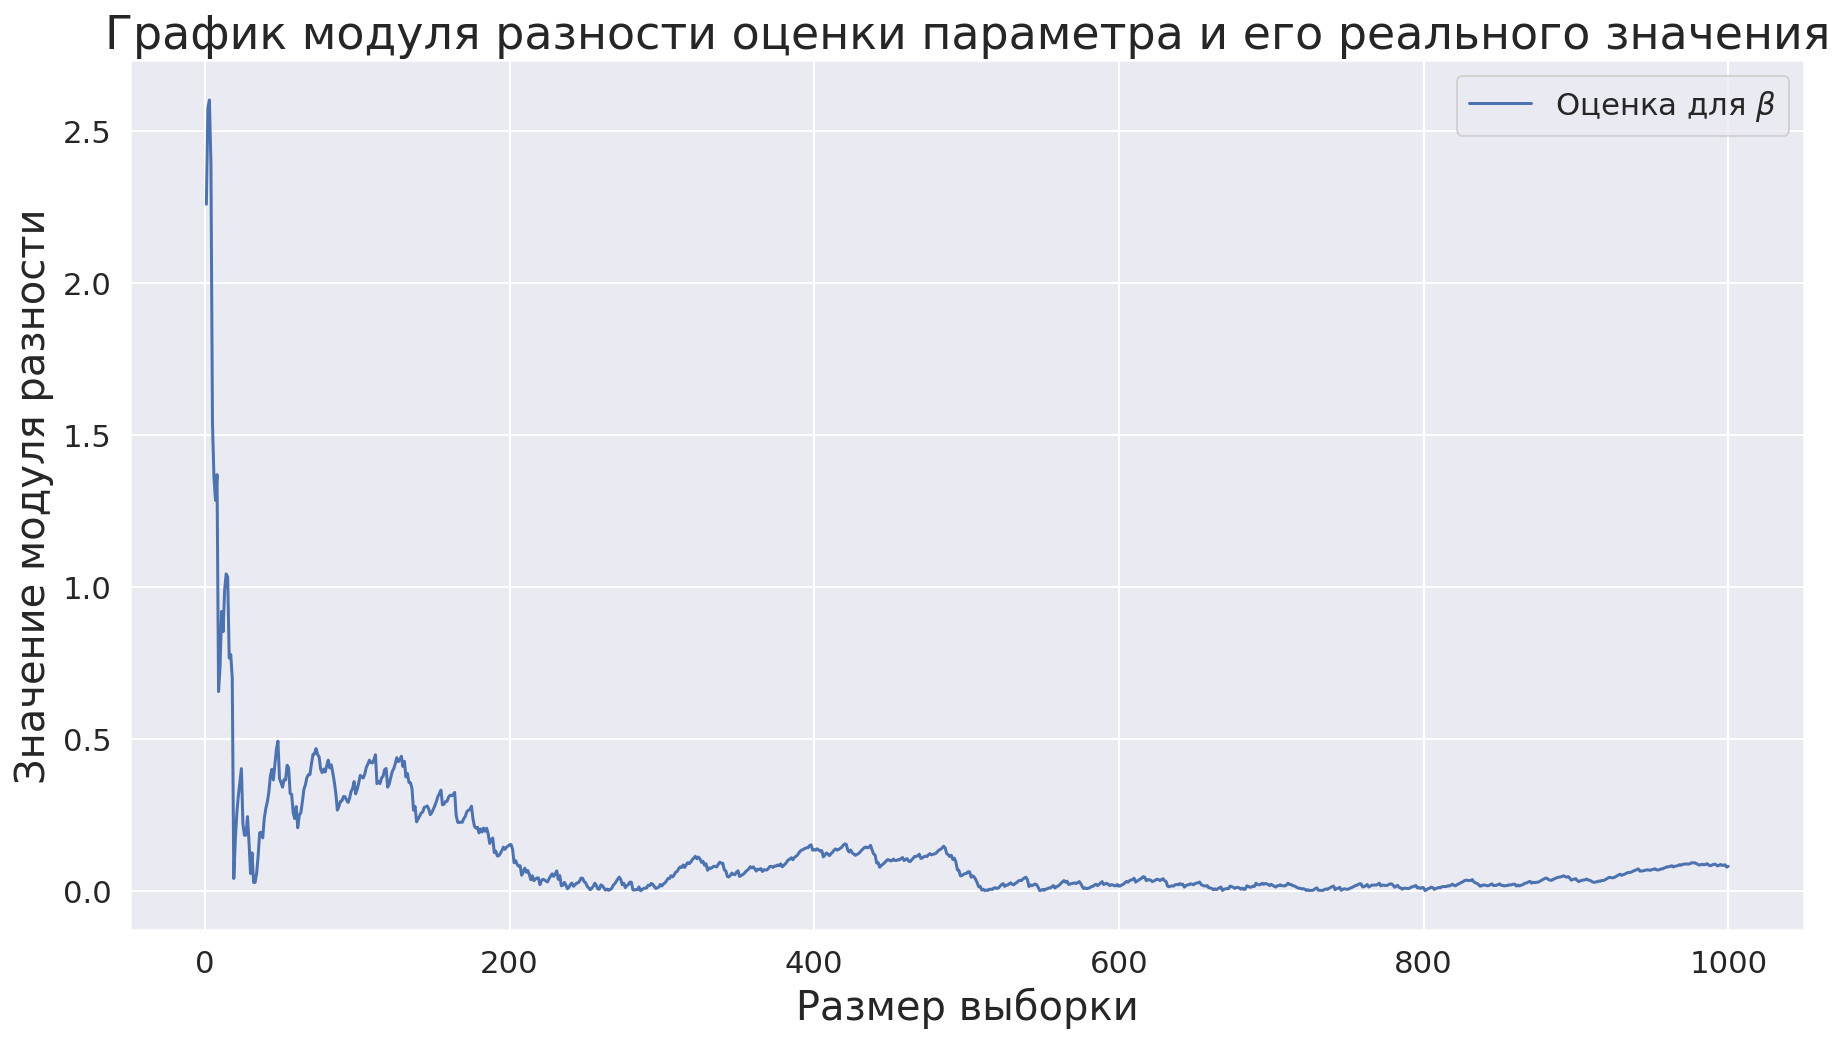

In [ ]:
draw_estimation_difference(
    gamma_sample,
    MomentsMethod.gamma_estimation,
    THETA,
    r'Оценка для $\beta$',
)

**Вывод** Как видно при больших размерах выборки модуль разности оценки параметра и его реального значения очень малы, что подтверждается тем, что в случае если функции моментов непрерывны, то оценки, получаемые методом моментов состоятельны.

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [ ]:
K = [10, 50] + list(range(100, 1001, 100))

In [ ]:
def find_bootstrap_estimations(
    sample: np.array,
    bootstrap_grid: List[int],
    mom_estimator: Callable[[np.array, np.array], np.array],
    ):
  means = np.zeros(len(bootstrap_grid))
  stds = np.zeros(len(bootstrap_grid))
  for i, k in enumerate(bootstrap_grid):
    subsample = sample[:k]
    bootstrap_samples = np.random.choice(subsample, (k, k))

    estimations_for_boot_samples = np.apply_along_axis(
        lambda row: mom_estimator(row)[-1],
        axis=1, 
        arr=bootstrap_samples)
    means[i] = np.mean(estimations_for_boot_samples)
    stds[i] = np.std(estimations_for_boot_samples)
  return means, stds

Дисперсия бутстрепной оценки для **нормального распределения**.


In [ ]:
sns.set_style("whitegrid")

In [ ]:
def draw_bootstrap_estim(
    sample: np.array,
    mom_estimator: Callable[[np.array, np.array], np.array],
    bootstrap_grid: List[int],
    title: str,
    ):
  fig, axis = plt.subplots()
  fig.set_size_inches(15, 8)
  axis.set_title(
      r'График среднего значения бутстрепных оценок {}'.format(title),
      fontsize = 23
  )

  btstr_means, btstr_stds = find_bootstrap_estimations(sample, bootstrap_grid, mom_estimator)

  grid = np.array(K)
  plt.plot(
      grid, 
      btstr_means,
      color='red',
  )
  plt.fill_between(
      x=grid, 
      y1=btstr_means + btstr_stds,
      y2=btstr_means - btstr_stds,
      alpha=0.10,
      color='red',
  )
  axis.set_xlim(K[0], K[-1])
  axis.set_xticks(grid)
  axis.set_xlabel('Размер и количество бутстрепных выборок', fontsize=20)
  axis.set_ylabel('Значение оценки параметра', fontsize=20)
  plt.show()

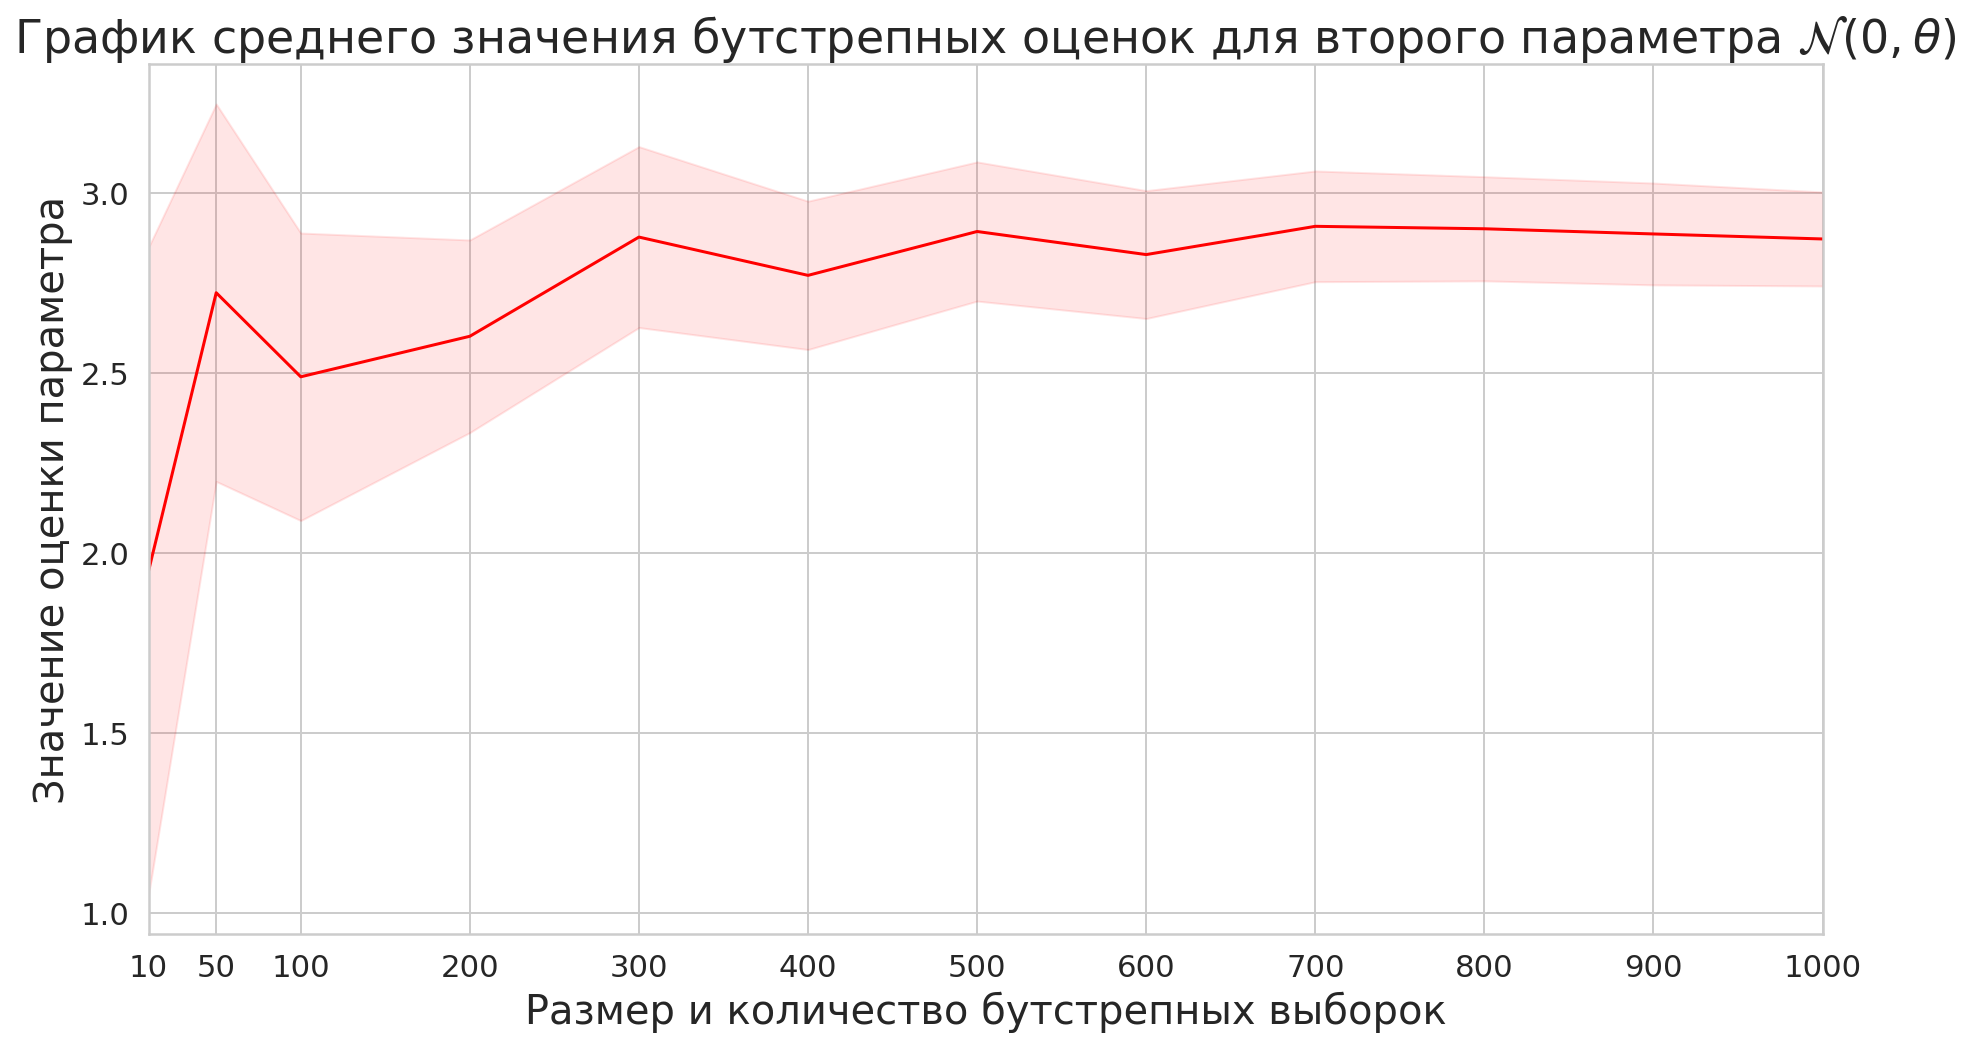

In [ ]:
draw_bootstrap_estim(
    norm_sample,
    MomentsMethod.normal_estimation,
    K,
    r'для второго параметра $\mathcal{N}(0, \theta)$'
)

Дисперсия бутстрепной оценки для **равномерного распределения**.


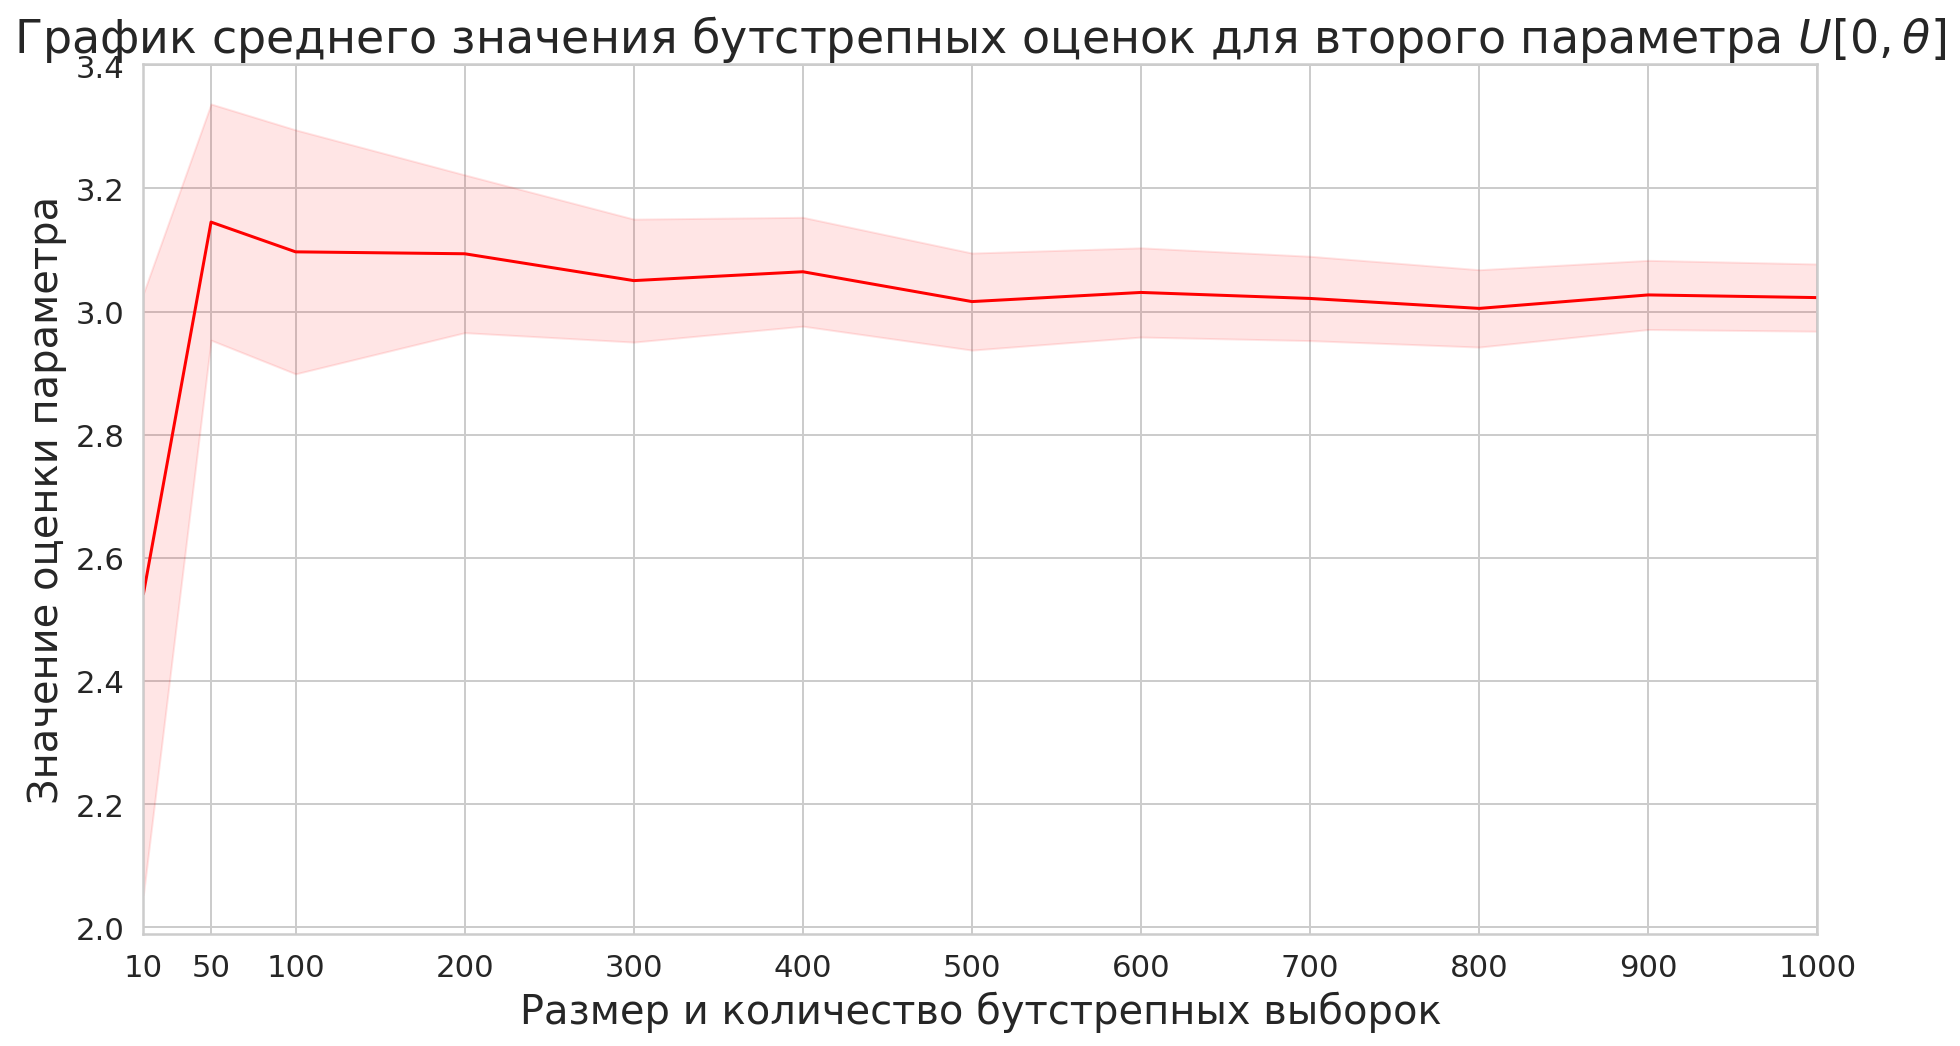

In [ ]:
draw_bootstrap_estim(
    uniform_sample,
    MomentsMethod.uniform_estimation,
    K,
    r'для второго параметра $U[0,\theta]$',
)

Дисперсия бутстрепной оценки для **гамма распределения**.


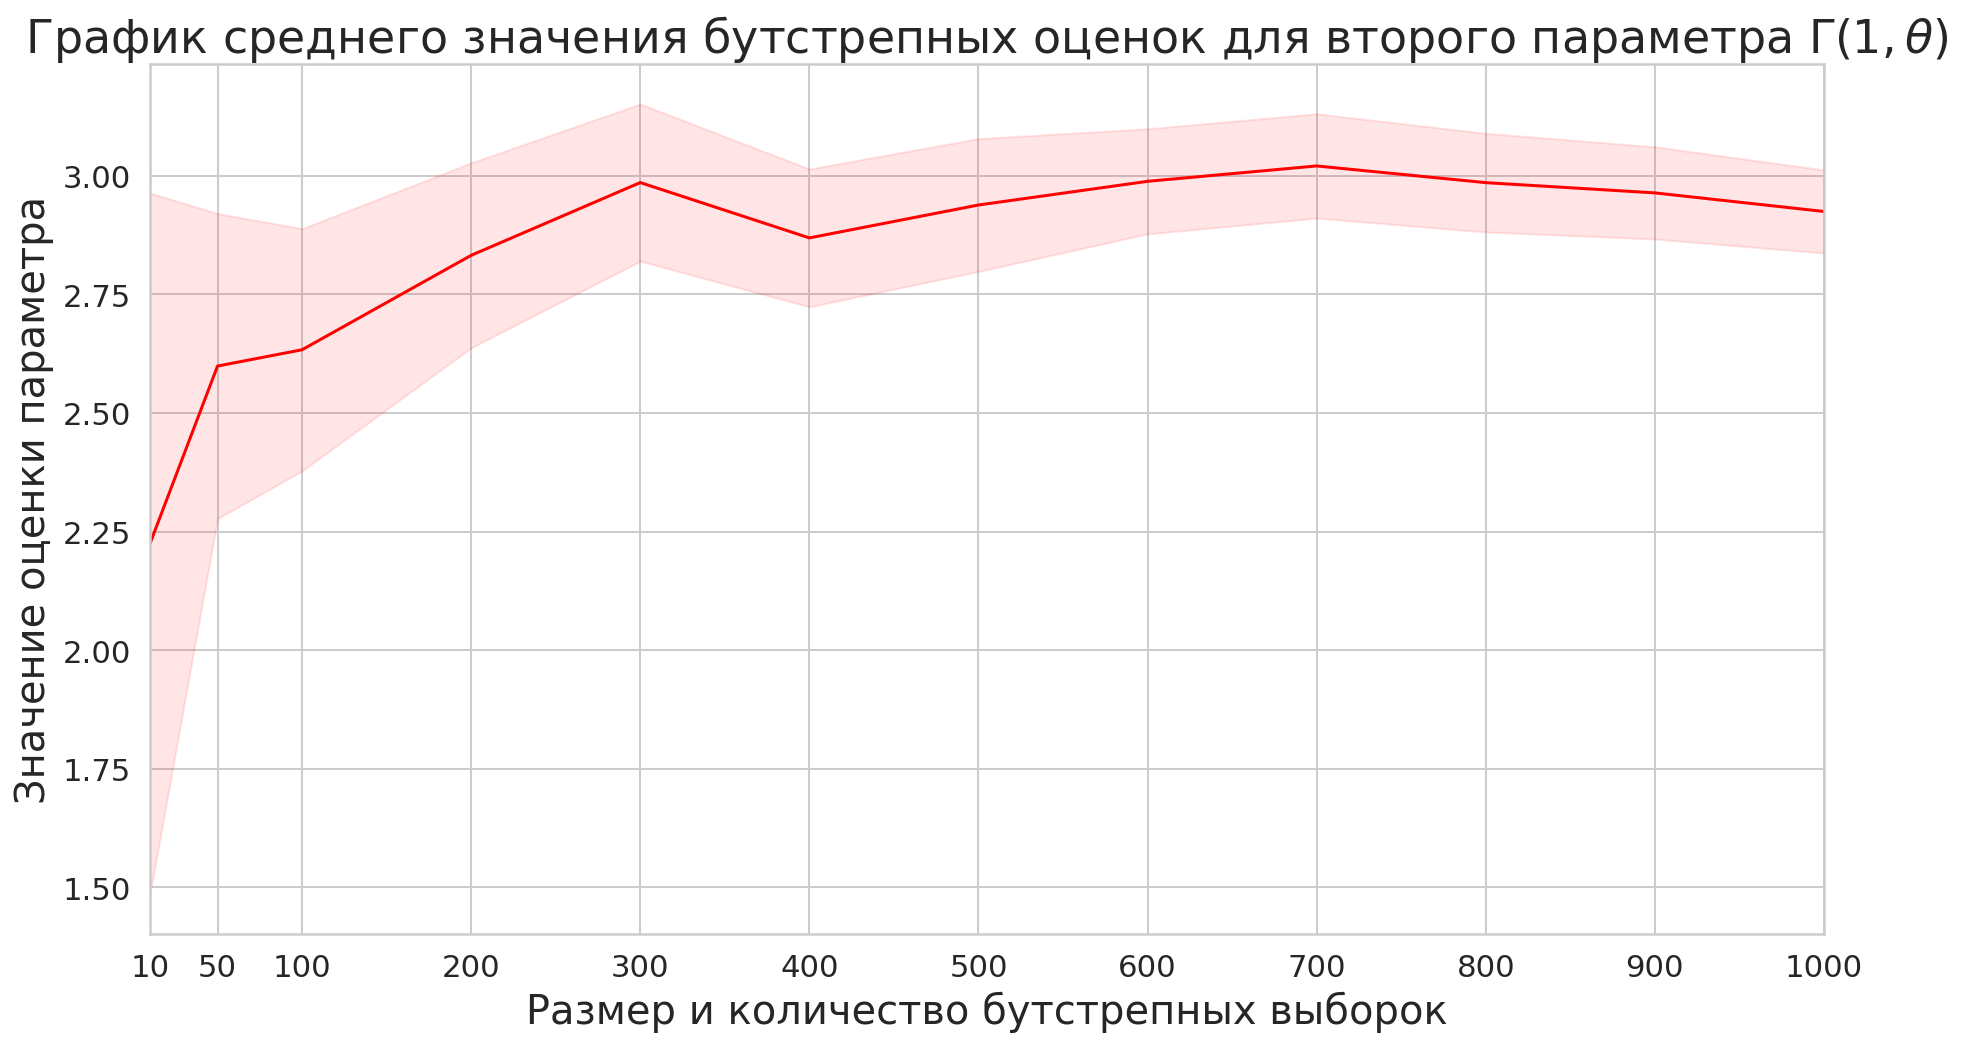

In [ ]:
draw_bootstrap_estim(
    gamma_sample,
    MomentsMethod.gamma_estimation,
    K,
    r'для второго параметра $\Gamma(1, \theta)$'
)

**Вывод** Как видно, при большом размере бутстрепной выборки получаемая оценка параметра близка к реальному значению, а также дисперсия бутстрепной выборки уменьшается.  